In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import sys
import os
from os import listdir
from os.path import isfile, join

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import f1_score



%matplotlib inline

In [2]:
full_data = pd.read_csv('../../data/train.csv')
test_data = pd.read_csv('../../data/test.csv')

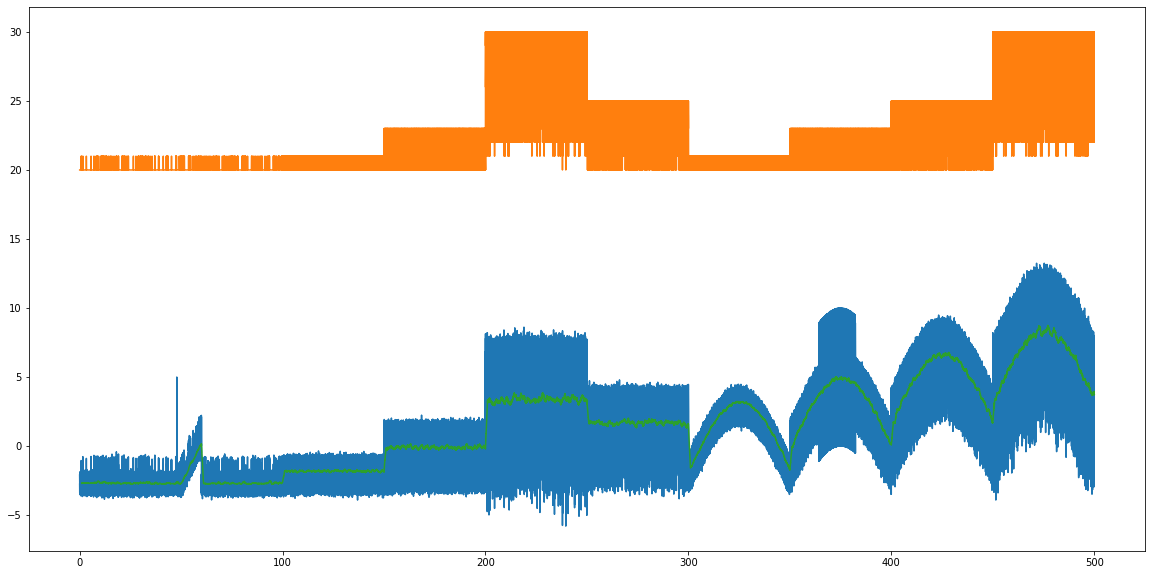

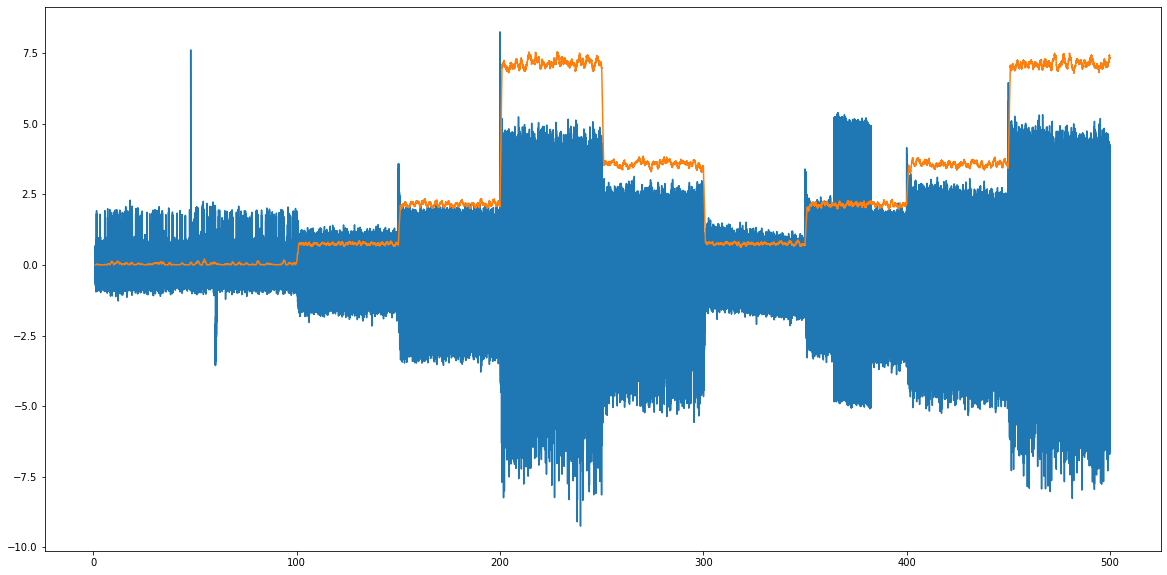

In [3]:
plt.figure(figsize = (20, 10))
plt.plot(full_data['time'], full_data['signal'])
plt.plot(full_data['time'], full_data['open_channels'] + 20)

rol_mean = full_data['signal'].rolling(10000).mean()
plt.plot(full_data['time'], rol_mean)

plt.figure(figsize = (20, 10))
plt.plot(full_data['time'], full_data['signal'] - rol_mean)
plt.plot(full_data['time'], full_data['open_channels'].rolling(10000).mean())

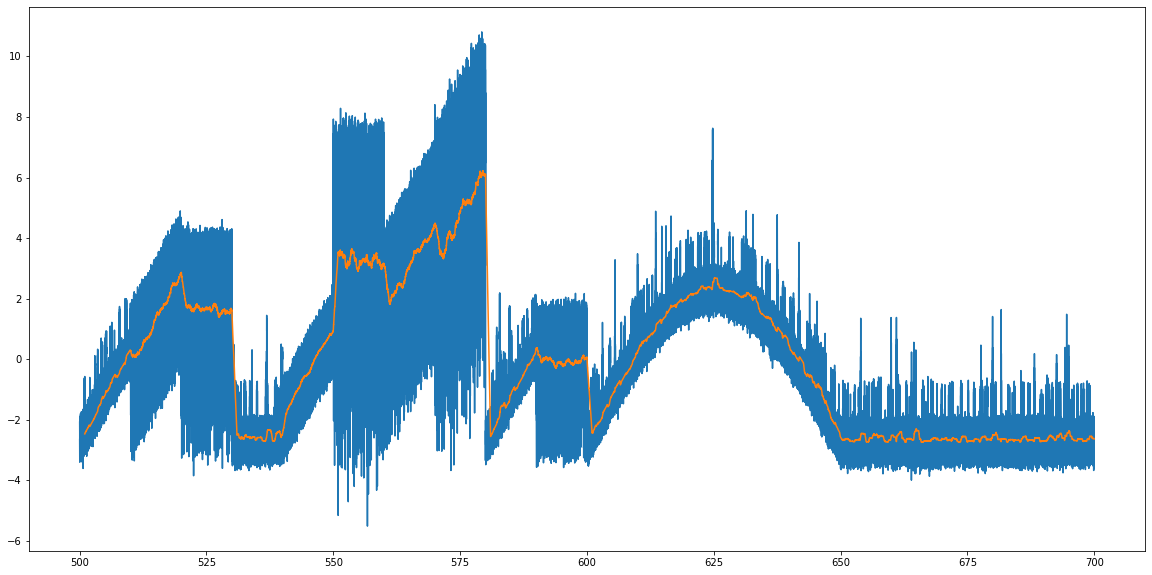

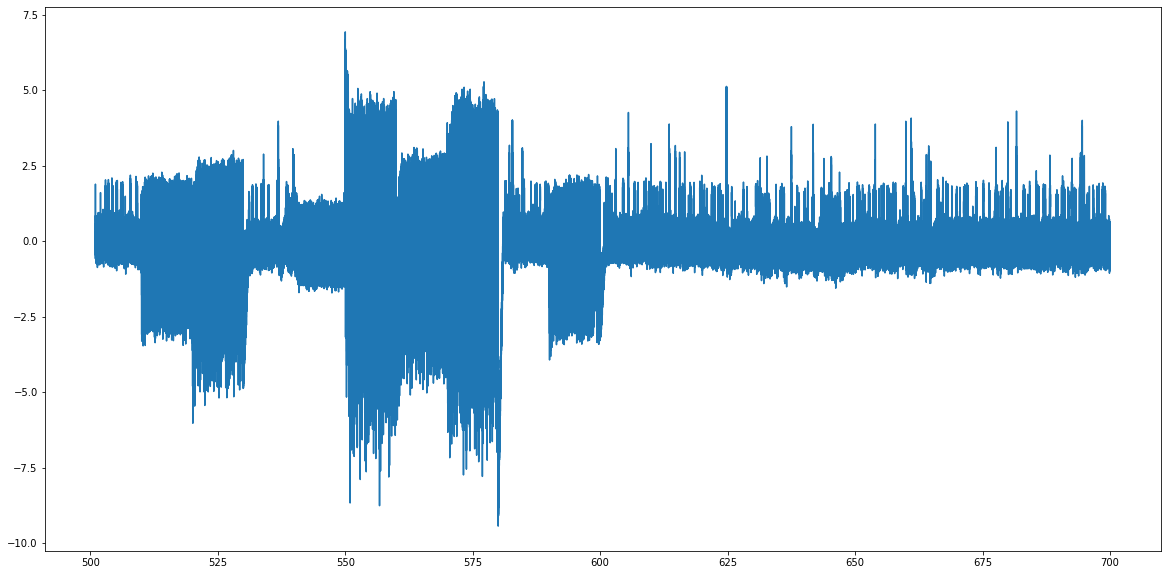

In [4]:
plt.figure(figsize = (20, 10))
plt.plot(test_data['time'], test_data['signal'])

rol_mean = test_data['signal'].rolling(10000).mean()
plt.plot(test_data['time'], rol_mean)

plt.figure(figsize = (20, 10))
plt.plot(test_data['time'], test_data['signal'] - rol_mean)

In [5]:
full_data

,time,signal,open_channels
0,0.0001,-2.7600,0
1,0.0002,-2.8557,0
2,0.0003,-2.4074,0
3,0.0004,-3.1404,0
4,0.0005,-3.1525,0
...,...,...,...
4999995,499.9996,2.9194,7
4999996,499.9997,2.6980,7
4999997,499.9998,4.5164,8
4999998,499.9999,5.6397,9


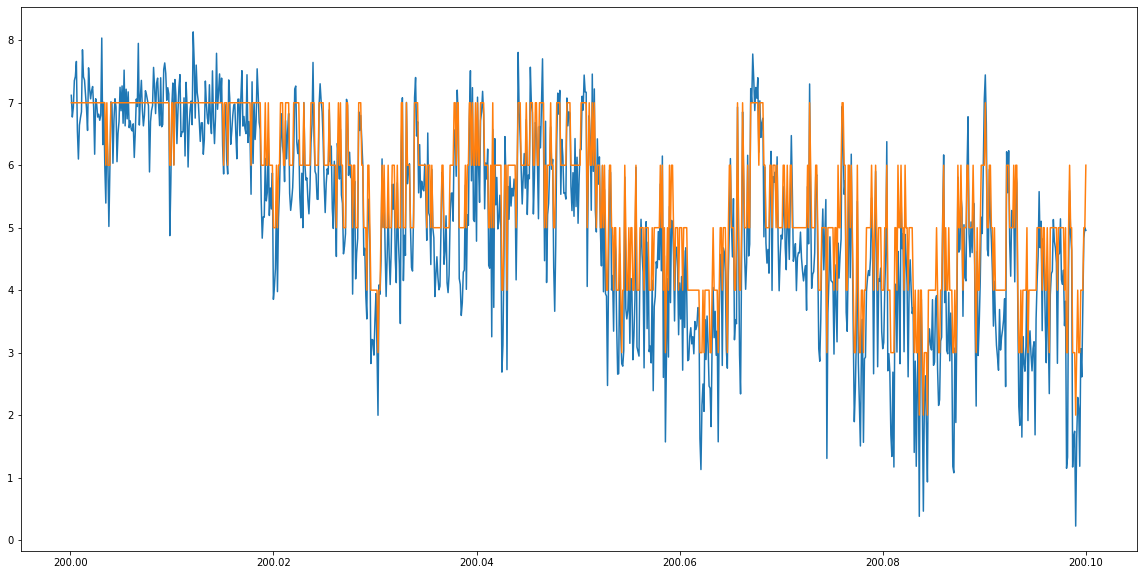

In [6]:
snipet = full_data[2000000:2001000]
plt.figure(figsize = (20, 10))
plt.plot(snipet['time'], snipet['signal'])
plt.plot(snipet['time'], snipet['open_channels'] - 3)

In [7]:
# i, j = 47, 48
# snipet = full_data[int(i*10000):int(j*10000)]
# plt.figure(figsize = (20, 10))
# plt.plot(snipet['time'], snipet['signal'])
# plt.plot(snipet['time'], snipet['open_channels'] + 20)
# plt.vlines(np.linspace(i, j, 50), ymin = -5, ymax = 20)

In [9]:
def convert_to_sliding_window(data):
    sliding_frame = pd.DataFrame(columns = ['signal1',
                                            'signal2',
                                            'signal3',
                                            'signal4',
                                            'signal5',
                                            'signal6',
                                            'signal7',
                                            'signal8',
                                            'signal9',
                                            'signal10',
                                            'open_channels'])
    percent = len(data) // 100
    for index in range(10, len(data)):
        if index % percent == 0: print('>', end = '')
            
        window = data[index - 10: index].copy()
        signals = list(window['signal'])
        open_channel = [list(window['open_channels'])[5]]
        
        new_row = pd.DataFrame([signals + open_channel], columns = sliding_frame.columns)
        sliding_frame = sliding_frame.append(new_row, ignore_index = True)
        
    print(' Done')
    return sliding_frame

def make_sliding_window_file_100k(full_data, start_index):
    snipet = full_data[start_index:start_index + 100000]
    sliding_frame = convert_to_sliding_window(snipet)
    sliding_frame.to_csv(f'sliding_window_100k_{start_index}.csv')

In [64]:
sliding_frame = convert_to_sliding_window(snipet)

>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>> Done


In [13]:
csvs = [f for f in listdir() if '.csv' in f]
csvs.sort(key = lambda x: int(x[x.index('100k_') + 5:x.index('.csv')]))

full_sliding_window = None
for file in csvs:
    new_frame = pd.read_csv(file)
    if 'Unnamed: 0' in new_frame.columns:
        new_frame.drop(['Unnamed: 0'], axis = 1, inplace = True)
    if file == csvs[0]:
        full_sliding_window = new_frame
    else:
        full_sliding_window = full_sliding_window.append(new_frame)

In [15]:
full_sliding_window

,signal1,signal2,signal3,signal4,signal5,signal6,signal7,signal8,signal9,signal10,open_channels
0,-2.7600,-2.8557,-2.4074,-3.1404,-3.1525,-2.6418,-2.6993,-2.5935,-2.6682,-2.7586,0
1,-2.8557,-2.4074,-3.1404,-3.1525,-2.6418,-2.6993,-2.5935,-2.6682,-2.7586,-3.1136,0
2,-2.4074,-3.1404,-3.1525,-2.6418,-2.6993,-2.5935,-2.6682,-2.7586,-3.1136,-2.6221,0
3,-3.1404,-3.1525,-2.6418,-2.6993,-2.5935,-2.6682,-2.7586,-3.1136,-2.6221,-2.7316,0
4,-3.1525,-2.6418,-2.6993,-2.5935,-2.6682,-2.7586,-3.1136,-2.6221,-2.7316,-2.9028,0
...,...,...,...,...,...,...,...,...,...,...,...
99985,5.2797,5.1174,4.3154,3.8352,3.6174,4.5083,3.3877,2.3484,4.1915,4.3713,8
99986,5.1174,4.3154,3.8352,3.6174,4.5083,3.3877,2.3484,4.1915,4.3713,2.9194,7
99987,4.3154,3.8352,3.6174,4.5083,3.3877,2.3484,4.1915,4.3713,2.9194,2.6980,7
99988,3.8352,3.6174,4.5083,3.3877,2.3484,4.1915,4.3713,2.9194,2.6980,4.5164,8


In [ ]:
#y_preds = rf.predict(X_test)
#y_preds = np.array([int(round(i)) for i in y_preds])

In [8]:
#chunk train data
chunked = list()
for i in range(10):
    chunked.append(full_data[(i) * 500000:(i + 1) * 500000].copy())
    
strategy = 'mean'    
transformed_by_baseline = [chunk.copy() for chunk in chunked]
for i in transformed_by_baseline:
    exec(f"""new_col = i['signal'].rolling(10000, min_periods = 1).{strategy}()""")
    i['signal'] -= new_col
    
# fix set 1 spike
chunk = transformed_by_baseline[0]
chunk.loc[chunk.index[478585:478615], 'signal'] = chunk.loc[chunk.index[478585:478615], 'signal'] / 16


chunk = transformed_by_baseline[7]
chunk.loc[chunk.index[142500:323000], 'signal'] = chunk.loc[chunk.index[142500:323000], 'signal'] / 1.8 - (.62 * int(strategy == 'mean'))

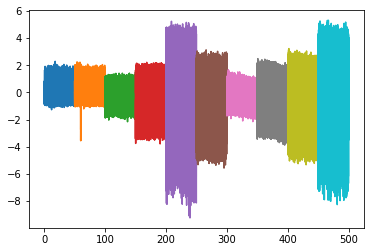

In [9]:
for i in transformed_by_baseline:
    plt.plot(i['time'], i['signal'])

In [10]:
#chunk data
chunked = list()
for i in range(20):
    chunked.append(test_data[(i) * 100000:(i + 1) * 100000].copy())
    
strategy = 'mean'    
transformed_by_baseline_test = [chunk.copy() for chunk in chunked]
for i in transformed_by_baseline_test:
    exec(f"""new_col = i['signal'].rolling(10000, min_periods = 1).{strategy}()""")
    i['signal'] -= new_col

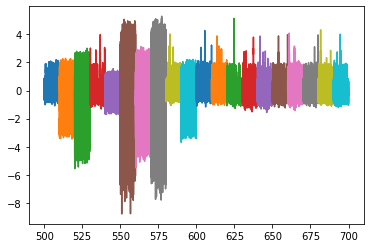

In [11]:
for i in transformed_by_baseline_test:
    plt.plot(i['time'], i['signal'])

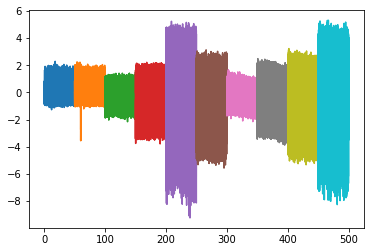

In [12]:
for i in transformed_by_baseline:
    plt.plot(i['time'], i['signal'])

In [13]:
# Similar waveforms
# Model 1
# Test: 1, 4, 9, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20
# Train: 1, 2
#
# Model 2
# Test: 5
# Train: 3, 7 
#
# Model 3
# Test: 2, 10
# Train: 4, 8
#
# Model 4
# Test: 3, 7
# Train: 6, 9
#
# Model 5
# Test: 6, 8
# Train: 5, 10

In [14]:
model1_data = pd.concat([transformed_by_baseline[0], transformed_by_baseline[1]])
model2_data = pd.concat([transformed_by_baseline[2], transformed_by_baseline[6]])
model3_data = pd.concat([transformed_by_baseline[3], transformed_by_baseline[7]])
model4_data = pd.concat([transformed_by_baseline[5], transformed_by_baseline[8]])
model5_data = pd.concat([transformed_by_baseline[4], transformed_by_baseline[9]])

In [15]:
#'''
current_model = model1_data
y = current_model['open_channels']
X = current_model['signal']
X_train, X_test, y_train, y_test = train_test_split(X, y)
tree = RandomForestRegressor(n_estimators = 10)
tree.fit(pd.DataFrame(X_train), y_train)

y_pred = [int(round(i)) for i in tree.predict(pd.DataFrame(X_test))]
print('test: ', f1_score(y_test, y_pred, average = 'macro'))

y_pred = [int(round(i)) for i in tree.predict(pd.DataFrame(X_train))]
print('train: ', f1_score(y_train, y_pred, average = 'macro'))
#''';

test:  0.9680564363397273
train:  0.9960262501531432


In [16]:
model1 = RandomForestRegressor(n_estimators = 10).fit(pd.DataFrame(model1_data['signal']), model1_data['open_channels'])
model2 = RandomForestRegressor(n_estimators = 10).fit(pd.DataFrame(model2_data['signal']), model2_data['open_channels'])
model3 = RandomForestRegressor(n_estimators = 10).fit(pd.DataFrame(model3_data['signal']), model3_data['open_channels'])
model4 = RandomForestRegressor(n_estimators = 10).fit(pd.DataFrame(model4_data['signal']), model4_data['open_channels'])
model5 = RandomForestRegressor(n_estimators = 20).fit(pd.DataFrame(model5_data['signal']), model5_data['open_channels'])

In [17]:
def predict(model, test_data):
    y_predictions = [int(round(prediction)) for prediction in model.predict(pd.DataFrame(test_data['signal']))]
    return pd.DataFrame({'time' : test_data['time'].values, 'open_channels' : y_predictions})

In [18]:
predictions = pd.DataFrame(columns = ['time', 'open_channels'])
predictions = pd.concat([predictions, predict(model1, transformed_by_baseline_test[0])])
predictions = pd.concat([predictions, predict(model3, transformed_by_baseline_test[1])])
predictions = pd.concat([predictions, predict(model4, transformed_by_baseline_test[2])])
predictions = pd.concat([predictions, predict(model1, transformed_by_baseline_test[3])])
predictions = pd.concat([predictions, predict(model2, transformed_by_baseline_test[4])])
predictions = pd.concat([predictions, predict(model5, transformed_by_baseline_test[5])])
predictions = pd.concat([predictions, predict(model4, transformed_by_baseline_test[6])])
predictions = pd.concat([predictions, predict(model5, transformed_by_baseline_test[7])])
predictions = pd.concat([predictions, predict(model1, transformed_by_baseline_test[8])])
predictions = pd.concat([predictions, predict(model3, transformed_by_baseline_test[9])])
predictions = pd.concat([predictions, predict(model1, transformed_by_baseline_test[10])])
predictions = pd.concat([predictions, predict(model1, transformed_by_baseline_test[11])])
predictions = pd.concat([predictions, predict(model1, transformed_by_baseline_test[12])])
predictions = pd.concat([predictions, predict(model1, transformed_by_baseline_test[13])])
predictions = pd.concat([predictions, predict(model1, transformed_by_baseline_test[14])])
predictions = pd.concat([predictions, predict(model1, transformed_by_baseline_test[15])])
predictions = pd.concat([predictions, predict(model1, transformed_by_baseline_test[16])])
predictions = pd.concat([predictions, predict(model1, transformed_by_baseline_test[17])])
predictions = pd.concat([predictions, predict(model1, transformed_by_baseline_test[18])])
predictions = pd.concat([predictions, predict(model1, transformed_by_baseline_test[19])])

In [24]:
predictions.to_csv('~/Desktop/test_predictions.csv', index = False, float_format='%.4f')

In [19]:
predictions

,time,open_channels
0,500.0001,0
1,500.0002,0
2,500.0003,0
3,500.0004,0
4,500.0005,0
...,...,...
99995,699.9996,0
99996,699.9997,0
99997,699.9998,0
99998,699.9999,0


In [96]:
sys.getsizeof(model1_data) // 1000000

24

In [98]:
sys.getsizeof(full_sliding_window) // 1000000

In [46]:
sys.getsizeof(model5) // 1000000

48